Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

# !wget --no-check-certificate \
#     "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
#     -O "/tmp/happy-or-sad.zip"

# zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref = zipfile.ZipFile("/mnt/external_data/happy_or_sad/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()



my code to examine images

In [2]:
os.listdir("/tmp/h-or-s")

['happy', 'sad']

In [3]:
happy_dir = "/tmp/h-or-s/happy"
happy_files = os.listdir(happy_dir)
sad_dir = "/tmp/h-or-s/sad"
sad_files = os.listdir(sad_dir)

print('Happy Files:')
print(happy_files[:5])

print('Sad Files:')
print(sad_files[:5])

Happy Files:
['happy1-00.png', 'happy1-01.png', 'happy1-02.png', 'happy1-03.png', 'happy1-04.png']
Sad Files:
['sad1-00.png', 'sad1-01.png', 'sad1-02.png', 'sad1-03.png', 'sad1-04.png']


In [4]:
import matplotlib.pyplot as plt

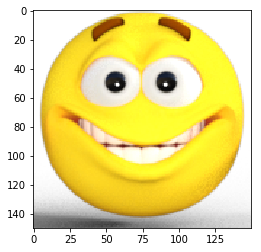

In [5]:
happy_index = 25
img = plt.imread(happy_dir + '/' + happy_files[happy_index])
plt.imshow(img)

(150, 150, 4)


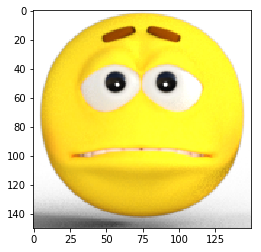

In [6]:
sad_index = 14
img = plt.imread(sad_dir + '/' + sad_files[sad_index])
print(img.shape)
plt.imshow(img)

End of my exploratory code

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  # Your Code
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('acc') > .999:
            print('\nReached 99.9% accuracy so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

In [8]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (150, 150, 3)),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (150, 150, 3)),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (150, 150, 3)),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation= 'relu'),
            tf.keras.layers.Dense(1, activation= 'sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0         
__________

In [9]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(directory = "/tmp/h-or-s",
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary'
    )

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [10]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(generator= train_generator, 
                              steps_per_epoch= 4, 
                              epochs = 20, 
                              callbacks= [callbacks], 
                              verbose = 1
      )
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
4/4 [==============================] - 2s 584ms/step - loss: 2.6241 - acc: 0.5750
Epoch 2/20
4/4 [==============================] - 1s 277ms/step - loss: 0.6608 - acc: 0.5375
Epoch 3/20
4/4 [==============================] - 1s 288ms/step - loss: 0.4750 - acc: 0.7625
Epoch 4/20
4/4 [==============================] - 1s 256ms/step - loss: 0.2311 - acc: 0.9250
Epoch 5/20
4/4 [==============================] - 1s 276ms/step - loss: 0.1845 - acc: 0.9250
Epoch 6/20
4/4 [==============================] - 1s 264ms/step - loss: 0.1175 - acc: 0.9750
Epoch 7/20
4/4 [==============================] - 1s 252ms/step - loss: 0.2052 - acc: 0.9000
Epoch 8/20
4/4 [==============================] - 1s 268ms/step - loss: 0.0772 - acc: 0.9750
Epoch 9/20
4/4 [==============================] - 1s 263ms/step - loss: 0.0648 - acc: 0.9625
Epoch 10/20
4/4 [==============================] - 1s 262ms/step - loss: 0.0411 - acc: 0.9750
Epoch 11/20
4/4 [==============================] - 1s 280ms/step - lo